# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
import os

from preprocessing.pre_for_train import preprocessing_train as pre_train

# Load Data

In [2]:
df = pd.read_csv('./news.csv')
df

,date,title,article,interested
0,2018-01-01 00:00:00,레알 베일 현금 토트넘 케인 대형 딜 가능성,홍의택 기자 겨울 이적시장이 문을 연다 대형 거래 가능성도 심심찮게 제기된다...,0
1,2018-01-01 00:00:00,또 일낸 윤정환의 세레소 기어이 컵 더블 달성,윤정환 감독이 이끄는 세레소 오사카가 2017 일왕배 정상에 올랐다 르방컵 에 ...,0
2,2018-01-01 00:00:00,일본에 또 이도류 제의 오타니 등장,투수와 타자를 함께한 오타니 쇼헤이 가 떠난 일본에 또 다른 이도류가 등장했다 ...,1
3,2018-01-01 00:00:00,억 사나이 반 다이크 리버풀 합류 우승 원한다,1083억의 사나이 버질 반 다이크가 리버풀에 공식 합류했다 리버풀은 지난해...,0
4,2018-01-01 00:00:00,년 보장 아닌 년 계약 양현종에게 전화위복,양현종의 1년 계약 오히려 전화위복이 된다 2018년 새해가 밝았지만 아직 계약을...,0
...,...,...,...,...
36225,2022-12-31 00:00:00,병역 기피 논란 석현준 드디어 입 열었다 소속팀서 안 놔줘 정말 오해,석현준 최승섭기자 2년 전 병무청이 발표한 병역기피자명단에 오른 축구국가대표 출...,0
36226,2022-12-31 00:00:00,바르사에서 년 뛴 선수잖아 영입 선택 옳았어,안토니오 콘테 감독이 클레망 랑글레를 칭찬했다 토트넘 훗스퍼는 오는 1월 1일 오후...,0
36227,2022-12-31 00:00:00,위기의 남자 김동엽 박진만 감독은 대행 시절 쓰지 않겠다 고 했다,내가 감독 대행을 하는 동안에는 볼 수 없을 것이다 박진만 삼성 감독이 대행 시...,0
36228,2022-12-31 00:00:00,텐 하흐 이례적 발언 화제 레알 마드리드한테 정말 고맙다,에릭 텐 하흐 맨체스터 유나이티드 감독이 레알 마드리드에 감사 인사를 전한 이유는 ...,0


# Preprocessing

## Split Data

In [3]:
x_train, y_train = pre_train(df['title'], df['interested'], split=False)

--------Ratio of Train Data--------
Not Interested = 89.605%
Interested = 10.395%


100%|███████████████████████████████████████████████████████████████████████████| 36230/36230 [01:10<00:00, 513.65it/s]


In [4]:
x_train

array([[    0,     0,     0, ...,    19,   538,    97],
       [    0,     0,     0, ..., 10254,  2211,   809],
       [    0,     0,     0, ...,   334,   304,   242],
       ...,
       [    0,     0,     0, ...,  2607,  1808,    38],
       [    0,     0,     0, ...,   571,   244,  2275],
       [    0,     0,     0, ...,   455,  1563,    77]])

In [5]:
y_train

0        0
1        0
2        1
3        0
4        0
        ..
36225    0
36226    0
36227    0
36228    0
36229    0
Name: interested, Length: 36230, dtype: int64

# Training

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17324705288492494035
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3643801600
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12296703718951805712
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [7]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
vocab_size

NameError: name 'X_train' is not defined

In [59]:
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, mode='min'),
             tf.keras.callbacks.ModelCheckpoint('./best.h5', monitor='val_loss', save_best_only=True, mode='min')
            ]

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=4, validation_split=0.15, callbacks=callbacks)

Epoch 1/100
6159/6159 [==============================] - 172s 28ms/step - loss: 0.2923 - accuracy: 0.1040 - val_loss: 0.2515 - val_accuracy: 0.1037
Epoch 2/100
6159/6159 [==============================] - 178s 29ms/step - loss: 0.2402 - accuracy: 0.1040 - val_loss: 0.2355 - val_accuracy: 0.1037
Epoch 3/100
6159/6159 [==============================] - 166s 27ms/step - loss: 0.2213 - accuracy: 0.1040 - val_loss: 0.2343 - val_accuracy: 0.1037
Epoch 4/100
6159/6159 [==============================] - 169s 27ms/step - loss: 0.2045 - accuracy: 0.1040 - val_loss: 0.2627 - val_accuracy: 0.1037
Epoch 5/100
6159/6159 [==============================] - 165s 27ms/step - loss: 0.1854 - accuracy: 0.1040 - val_loss: 0.2634 - val_accuracy: 0.1037
Epoch 6/100
 138/6159 [..............................] - ETA: 2:33 - loss: 0.1593 - accuracy: 0.1033

# Evaluate

In [19]:
x_test = pre_train(X_test,stopwords)

100%|█████████████████████████████████████████████████████████████████████████████| 7246/7246 [00:11<00:00, 612.20it/s]


In [57]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

227/227 [==============================] - 2s 9ms/step - loss: 0.9303 - accuracy: 0.6975

 테스트 정확도: 0.6975


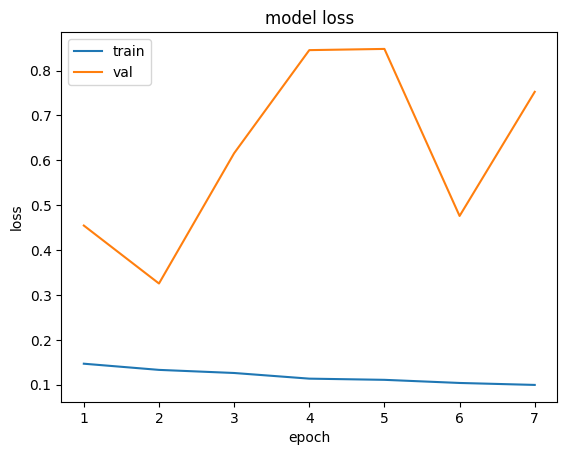

In [58]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()